In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('fuel_econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


<Container object of 3 artists>

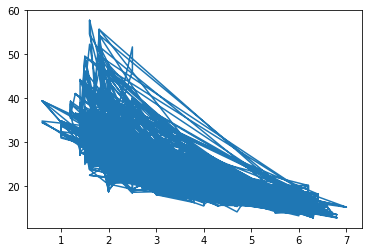

In [4]:
plt.errorbar(data=df, x='displ', y='comb')

In [5]:
df['displ'].describe()

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64

In [6]:
bins_e = np.arange(0.6, 7+0.2, 0.2)               # bin edges 
bins_c = bins_e[:-1] + 0.1                        # bin centers

In [7]:
bins_e

array([ 0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,
        2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,
        5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,  6.8,  7. ])

In [8]:
bins_c

array([ 0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,  2.3,  2.5,  2.7,
        2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,  4.5,  4.7,  4.9,
        5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,  6.7,  6.9])

to what bin every point belongs:

In [11]:
displ_binned = pd.cut(df['displ'], bins_e, include_lowest=True) 

group ```comb``` column by these binned points

In [15]:
df['comb'].groupby(displ_binned).mean()

displ
(0.599, 0.8]    37.057583
(0.8, 1.0]      33.469158
(1.0, 1.2]      35.838600
(1.2, 1.4]      31.964468
(1.4, 1.6]      30.489490
(1.6, 1.8]      31.996801
(1.8, 2.0]      27.534614
(2.0, 2.2]      31.790900
(2.2, 2.4]      26.888429
(2.4, 2.6]      28.589656
(2.6, 2.8]      20.227183
(2.8, 3.0]      22.464063
(3.0, 3.2]      22.638350
(3.2, 3.4]      21.962225
(3.4, 3.6]      22.602561
(3.6, 3.8]      20.616143
(3.8, 4.0]      18.977208
(4.0, 4.2]      18.320850
(4.2, 4.4]      18.160620
(4.4, 4.6]      18.668650
(4.6, 4.8]      18.661085
(4.8, 5.0]      18.054693
(5.0, 5.2]      16.481675
(5.2, 5.4]            NaN
(5.4, 5.6]      17.972043
(5.6, 5.8]      18.455833
(5.8, 6.0]      15.161788
(6.0, 6.2]      16.428960
(6.2, 6.4]      16.452696
(6.4, 6.6]      14.890232
(6.6, 6.8]      13.716614
(6.8, 7.0]      15.256400
Name: comb, dtype: float64

In [16]:
comb_means = df['comb'].groupby(displ_binned).mean()

Plot means against bin centers:

<Container object of 3 artists>

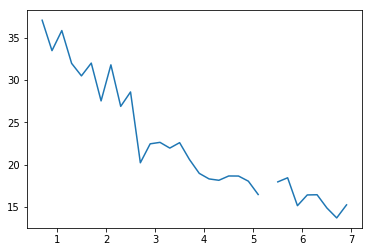

In [18]:
plt.errorbar(x=bins_c, y=comb_means)

<Container object of 3 artists>

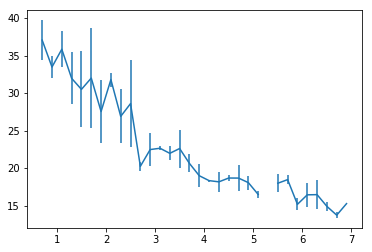

In [19]:
comb_std = df['comb'].groupby(displ_binned).std()
plt.errorbar(x=bins_c, y=comb_means, yerr=comb_std)